#### Un altro passettino: ecco in azione l'*Istituto Centrale di Statistica* con a fianco la *Banca d'Italia*

use it also in [Notebook viewer](https://nbviewer.org/github/terna/ejmmp/blob/main/model0/model0.ipynb)

if the content is missing to update, follow once [Notebook viewer and flush cache](https://nbviewer.org/github/terna/ejmmp/blob/main/model0/model0.ipynb?flush_cache=true)

[Wikipedia as a memo](https://en.wikipedia.org/wiki/Stock-flow_consistent_model#cite_note-42)

In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import random as r
import matplotlib.pyplot as plt
import commonVar as cmv
import numpy as np
from tools import *

### Stock-flow *model1c*, with real and financial elements

- Besides the real part of the economy, we introduce the initial element of the monetary side of the economy.

  

- We are introducing gradually loans, credits, debts, capital stock, interest rate.



- Firms have unlimited funds that they put freely in their activities, balancing other agent negative cash, if any.

  

- Saving is abstension from consuming, increasing agent liquidity.



- Investments are uniquely for replacement, without technical progress.

  

### symbol table

[symbol table](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols) in $\LaTeX$ 

$a_i$ -  with $a_i \in \mathbf{A}$; agent number $N=|\mathbf{A}|$, `agentList` and`agentNum`

$a^e_i$ -  with $a^e_i \in \mathbf{A^e}$ and $\mathbf{A^e} \subset \mathbf{A}$; employer number $N^e=|\mathbf{A^e}|$ in range $[N^e_{min},N^e_{max}]$, `employerList`

$\mathbf{F}$ - firms' set, with $f_j \in \mathbf{F}$ being $N^f = |\mathbf{F}|$,  with $N^f = |\mathbf{F}| = |\mathbf{A^e}|$ , `firmList`

$\mathbf{A}^w$ - working agents' set, being $\mathbf{A}^w \subseteq \mathbf{A}$, with $N^w_i=|\mathbf{A}^w_i|$ number of working agents employed by employer $i$, also including self-employed employers, with $a_i \in \mathbf{A}^e$

$\mathbf{B}$ - banks' set, with $b_j \in \mathbf{B}$ being $N^b = |\mathbf{B}|$, `bankList`

$p$ - price `price`

$u$ - unemployment rate `unemploymentRate`

$dimensional~heterogeneity$ is a $true/false$ chooser, forcing increasing firms to attract more workers. `dimensionalHeterogeneity`

$\pi_{i,t}$ - labor productivity, a uniformly distributed decimal number in range $[\pi_{min},\pi_{max}]$,`productivity`

&Delta;$\pi_{i,t}$ - uniperiodal additive productivity correction in range $[$&Delta;$\pi_{min},$ &Delta;$\pi_{max}]$, `productivityDelta`

$n_{i,t}$ - number of workers in a firm

$q_{i,t}$ - production in quantity, `production`

$\Pi_{i,t}$ - profit, `profit`

$\rho$ - dividend distribution share, `rho`

$W$ - wage `wage`

$R_{i,t}$ - revenues, `revenues`

$s_{i,t}$ - sales in quantity, `sales`

$v_{i,t}$ - in**v**entories (final, initial), `initialInventories`, `finalInventories`

$d_{i}$ - deperibility share of the production, `deperibilityShare`, setting $d_{max}$

$c_{i,t}$ - consumption rate, a uniformly distributed decimal number in range $[c_{min},c_{max}]$,`consumptionRate`

$C_{i,t}$ - consumption of $i$ in $t$

$I_{i,t}$  - investment plan  of $i$ in $t$, a uniformly distributed realization in range $[I_{min},I_{max}]$,`investmentProgram`

$H_{i,t}$  - high powered money (cash) held by individuals (also acting as employers), `cashMoney`

$M1_{i,t}$ - checking account money deposits held by  $a_i$ at time $t$, `checkingAccount`

$M1^f_{i,t}$ - firm's bank account (with positive or negative balance), `bankAccount`

the investment and consumption actions are repeated in each cycle, looking around randomly for the sellers; currently `nOfConsumptionActions` $=30$ and `nOfInvestmentActions`$=10$; each consumption buy action is at maximum the 20% of the planned consumptions in that cycle; instead, each investment buy action can reach the whole amount of the investment program of the cycle; each buy action is limited by the residual capabilty of the seller

**magically**, the same good can be a consumption item or an investment one

$T$ - number of cycles `ncycles`

$t$ - current cycle `cycle`


### agent structure

The structure of a **generic agent**: it can represent an employer, a worker, an unemployed person.

When an agent is created, the **initialization process** defines:

- its numerical id, `num`
- its entrepreneur status, `entrepreneur`, set to $false$
- the id of its employer, `myEmployer`, set to $0$
- if entrepreneur, the id of its firm, `myFirm`, set to $0$
- $c_{i,0}$ - consumption rate, set to $0$
- $H_{i,0}$ - cash money, set to $0$ 
- $M1_{i,0}$ - checking account money deposits, set to $0$



## firm structure

- $R_{i,0}$ - `revenues`, initial value  $0$
- $s_{i,0}$ - `sales`, initial value  $0$
- $v^i_{i,0}$ - in**v**entories, `initialInventories`, set to $0$ 
- $v^f_{i,0}$ - in**v**entories, `finalInventories`, set to $0$ 
- $d_{i}$ - deperibility share, a uniformly distributed decimal number in range $[0,d_{max}]$,`deperibilityShare`
- $I_{i,0}$  - investment plan, set to $0$
- $\Pi_{i,0}$ - profit, set to $0$, being the related dividend $D_{i,0}$, set to $0$
- $M1^f_{i,0}$ - firm's bank account, set to $0$
- $\pi_{i,t-1}$ is set after the initialization step, if an agent becomes an employer



each **generic agent** has the **functions**:

- **buyConsumptionGoods** 

  $C_{i,t}=c_{i,t} (W+D_{i,t-1})$; using $D_{i,t-1}$ we introduce a lag with a (possible) cyclical effect

  being $bu$ the buyer and $se$ the seller (firm), for each fraction $C_{i,t}/k$ 

  ($k$ is the number of buying actions in each cycle with random share [0,cmv.maxConsumptionShareInSubstep))

  &Delta;$M1^f_{se,t}=C_{bu,t}/k$

  &Delta;$M1_{bu,t}=-C_{bu,t}/k$




each **firm** has the **functions**:

- **produce** function, with:

  $\pi_{i,t}=\pi_{i,t-1}+$&Delta;$\pi_{i,t}$

  $q_{i,t}=n_{i,t} \pi_{i,t}$

  

- **payWages**

  paying $W$ to each worker in each time $t$

  &Delta;$M1_{i,t}=W$ for  $a_i \in \mathbf{A}^w$ 

  &Delta;$M1^f_{i,t}=-W \mathbf{N}^w_i$ for $a_i \in \mathbf{A}^e$ 

  

- **buyInvestmentGoods**

  $I_{j,t}$ for $f_j \in \mathbf{F}$  ($I_{j,t}$ is exogenously set)

  being $bu$ the buyer (firm) and $se$ the seller (firm), for each fraction $I_{j,t}/k$

  ($k$ is the number of investment actions in each cycle, with random share [0,cmv.maxInvestmentShareInSubstep))

  &Delta;$M1^f_{se,t}=I_{bu,t}/k$

  &Delta;$M1^f_{bu,t}=-I_{bu,t}/k$

  

- **makeBalanceSheet**

  $v^f_{i,t}=v^i_{i,t}+(q_{i,t}-s_{i,t}) (1 - d_{i})$

  $R_{i,t}=p s_{i,t}$

  $\Pi_{i,t}=R_{i,t}-W n_{i,t}-p(v^f_{i,t}-v^i_{i,t})$



Agent **bank** is a special subject operating on the financial side of the model  (to be continued)



In [3]:
class Agent():
    def __init__(self, num):
        self.num=num
        self.entrepreneur=False
        self.myFirm=0
        self.myEmployer=0
        self.consumptionRate=0
        self.cashMoney=0
        self.checkingAccount=0
        self.perceivedWage=0
        self.perceivedDividend=0

    def buyConsumptionGoods(self,k):
        if k==0: 
            self.consumptionRate=r.uniform(cmv.consumptionRateMin,cmv.consumptionRateMax)
            self.consumption=(self.perceivedWage+self.perceivedDividend)*self.consumptionRate
            if self.consumption < 0: self.consumption=0 # impossible, being perceivedWage and
                                                        # perceivedDividend >=0 but in case of
                                                        # future modifications ...
            self.perceivedWage=0
            self.perceivedDividend=0
            self.madeConsumption=0
                
        r.shuffle(cmv.firmList)
        mySeller=cmv.firmList[0]
        self.purchase=r.uniform(0,cmv.maxConsumptionShareInSubstep)*self.consumption 
                            # mean value should be calibrated with thenumber of buy action
        self.purchase=min(self.purchase,self.consumption-self.madeConsumption)
        self.purchase=min(self.purchase,cmv.price*(mySeller.production+\
                                        mySeller.initialInventories-mySeller.sales))
        mySeller.sales+=self.purchase/cmv.price
        mySeller.bankAccount+=self.purchase
        #self.consumption-=self.purchase
        self.checkingAccount-=self.purchase
        self.madeConsumption+=self.purchase
    


In [4]:
class Firm():
    def __init__(self, num):
        self.num=num
        self.myWorkers=[]
        self.myEntrepreneur=0
        self.productivity=0
        self.initialInventories=0
        self.finalInventories=0
        self.bankAccount=0
        self.revenues=0 #sales*price
        self.sales=0
        self.deperibilityShare=r.uniform(0,cmv.maxDeperibilityShare)
        self.investmentProgram=0
        self.profit=0
        self.madeInvestment=0
        
    def produce(self):
        self.initialInventories=self.finalInventories
        self.productivity+=r.uniform(cmv.productivityDeltaMin,cmv.productivityDeltaMax)
        self.productivity=max(self.productivity,0)
        
        self.production=len(self.myWorkers)*self.productivity
        self.sales=0

    def payWages(self):
        for anAgent in self.myWorkers:
            anAgent.perceivedWage=cmv.wage
            anAgent.checkingAccount+=cmv.wage
        self.bankAccount-=cmv.wage*len(self.myWorkers)
            
    def buyInvestmentGoods(self,k):
        if k==0: 
            self.investmentProgram=r.uniform(cmv.investmentMin,cmv.investmentMax)
            self.madeInvestment=0
                       
        r.shuffle(cmv.firmList)
        mySeller=cmv.firmList[0]
        self.myInvestment=r.uniform(0,cmv.maxInvestmentShareInSubstep)*self.investmentProgram
        self.myInvestment=min(self.myInvestment,cmv.price*(mySeller.production+\
                              mySeller.initialInventories-mySeller.sales))
        mySeller.sales+=self.myInvestment/cmv.price
        mySeller.bankAccount+=self.myInvestment
        
        self.bankAccount-=self.myInvestment
        self.investmentProgram-=self.myInvestment
        self.madeInvestment+=self.myInvestment
        
    def makeBalanceSheet(self):
        self.lostProduction=0
        if self.production - self.sales > 0: 
            self.lostProduction=(self.production - self.sales)*self.deperibilityShare
        #print(self.num, lostProduction,self.productivity)
        self.finalInventories=self.initialInventories+self.production-\
                              self.sales-self.lostProduction
        self.revenues=self.sales*cmv.price
        self.profit=self.revenues - len(self.myWorkers)*cmv.wage + \
          (self.finalInventories-self.initialInventories)*cmv.price
        #print(self.num,self.profit,self.revenues,len(self.myWorkers)*cmv.wage,\
        #      self.finalInventories, self.initialInventories)
        
    def distributeDividend(self):
        if self.profit > 0:
            dividend=cmv.rho*self.profit
            self.bankAccount-=dividend
            self.myEntrepreneur.checkingAccount+=dividend
            self.myEntrepreneur.perceivedDividend=dividend        


### agent setup

- agent basic creation

  

- creation of entrepreneur list

  

- selecting entrepreneurs and creating their firms

  

- with a given (heterogeneous) productivity

  

- linking the firm to its entrepreneur, considering the entrepreneur itself as a worker in its firm

  

- creation of a temporary workforce list of to-be-employed agent, escluding entrepreneurs (already self employed)

  

- applying the unmployement rate to exclude agents

  

- assigning workforce (to-be-employed agents) to firms, with a reinforcement mechanism, gradually giving more attraction/hiring capability to firms growing the most



In [5]:
def setup():
    cmv.agentList=[]
    for n in range(cmv.agentNum):
        anAgent=Agent(n+1)
        cmv.agentList.append(anAgent)
    

    # creation of entrepreneur list
    cmv.entrepreneurNum=r.randint(entrepreneurMin, entrepreneurMax)

    cmv.entrepreneurList=[]
    cmv.firmList=[]
    entrepreneurCandidates=cmv.agentList.copy()

    for n in range(cmv.entrepreneurNum):
        i=r.randint(0,len(entrepreneurCandidates)-1)
        entrepreneurCandidates[i].entrepreneur=True
        aFirm=Firm(entrepreneurCandidates[i].num)
        entrepreneurCandidates[i].myFirm=aFirm
        entrepreneurCandidates[i].myEmployer=aFirm
        aFirm.myEntrepreneur=entrepreneurCandidates[i]
        aFirm.myWorkers.append(entrepreneurCandidates[i])
        aFirm.productivity=\
                r.uniform(cmv.productivityMin,cmv.productivityMax)
        cmv.entrepreneurList.append(entrepreneurCandidates.pop(i))
        cmv.firmList.append(aFirm)
        
    cmv.firmNum=len(cmv.firmList)
    
    # creation of workforce list
    toBeEmployed=[]

    for anAgent in cmv.agentList:
        if not anAgent.entrepreneur: toBeEmployed.append(anAgent)
    for k in range(round(cmv.unemploymentRate*cmv.agentNum)):
        toBeEmployed.pop(r.randint(0,len(toBeEmployed)))
    #len(toBeEmployed)


    # assigning workforce to firms
    tmpFirmListWithDuplications=cmv.firmList.copy()
    for anAgent in toBeEmployed:
        choice=r.choice(tmpFirmListWithDuplications)
        anAgent.myEmployer=choice
        choice.myWorkers.append(anAgent)
        if cmv.dimensionalHeterogeneity: tmpFirmListWithDuplications.append(choice)
            
    cmv.totalProductionSeries=[]
    cmv.totalProductionInfraVarSeries=[]
    cmv.totalProfitSeries=[]
    cmv.totalProfitInfraVarSeries=[]
    cmv.totalInitialInventoriesSeries=[]
    cmv.totalInitialInventoriesInfraVarSeries=[]
    cmv.totalFinalInventoriesSeries=[]
    cmv.totalFinalInventoriesInfraVarSeries=[]
    cmv.totalConsumptionSeries=[]
    cmv.totalEntrepreneurConsumptionSeries=[]
    cmv.totalNonEntrepreneurConsumptionSeries=[]
    cmv.totalConsumptionInfraVarSeries=[]
    cmv.totalInvestmentSeries=[]
    cmv.totalInvestmentInfraVarSeries=[]
    cmv.totalCashMoneySeries=[]
    cmv.totalCashMoneyInfraVarSeries=[]
    cmv.totalCheckingAccountSeries=[]
    cmv.totalCheckingAccountInfraVarSeries=[]
    cmv.totalBankAccountSeries=[]
    cmv.totalBankAccountInfraVarSeries=[]

    cmv.totalLostProductionSeries=[]

### meta actions



- *produceAll* orders to the firms to produce and to collects the results

  

- *payWagesAll* orders to the firms to pay wages, also to the entrepreneurs

  

- *buyConsumptionGoodsAll* orders to the agents to buy consumption goods

  

- *buyInvestmentGoodsAll* orders to the firms to buy investment goods

  

- *buyConsumptionOrInvestmentGoodsAll* orders to the agents and to the firms to buy consumption or investment goods

  

- *makeBalanceSheetAll* with firm making accounts



- *accountCashMoneyAll* summarizing eveyone cash money at the end of a cycle

  

- *accountCheckingAccountAll* summarizing eveyone checking accounts at the end of a cycle

  

- *accountBankingAccountAll* summarizing firm banking accounts at the end of a cycle



In [6]:
def produceAll():
    cmv.totalProductionSeries.append(0)
    cmv.totalProductionInfraVarSeries.append(0)
    cmv.totalInitialInventoriesSeries.append(0)
    cmv.totalInitialInventoriesInfraVarSeries.append(0)

    for aFirm in cmv.firmList:
        aFirm.produce()
        cmv.totalProductionSeries[-1]+=aFirm.production
        cmv.totalProductionInfraVarSeries[-1]+=aFirm.production**2
        cmv.totalInitialInventoriesSeries[-1]+=aFirm.initialInventories
        cmv.totalInitialInventoriesInfraVarSeries[-1]+=aFirm.initialInventories**2

    cmv.totalProductionInfraVarSeries[-1]=\
                            (cmv.totalProductionInfraVarSeries[-1]/cmv.firmNum - \
                            (cmv.totalProductionSeries[-1]/cmv.firmNum)**2)
    cmv.totalInitialInventoriesInfraVarSeries[-1]=\
                            (cmv.totalInitialInventoriesInfraVarSeries[-1]/cmv.firmNum - \
                            (cmv.totalInitialInventoriesSeries[-1]/cmv.firmNum)**2)
                                          

In [7]:
def payWagesAll():
    for aFirm in cmv.firmList:
        aFirm.payWages()


In [8]:
def buyConsumptionGoodsAll():
    cmv.totalEntrepreneurConsumptionSeries.append(0) 
    cmv.totalNonEntrepreneurConsumptionSeries.append(0)
    cmv.totalConsumptionSeries.append(0)
    cmv.totalConsumptionInfraVarSeries.append(0)
    for k in range(cmv.nOfConsumptionActions):
        r.shuffle(cmv.agentList)
        for anAgent in cmv.agentList:
            anAgent.buyConsumptionGoods(k)
            if k==cmv.nOfConsumptionActions-1:
                if anAgent.entrepreneur:
                    cmv.totalEntrepreneurConsumptionSeries[-1]+=anAgent.madeConsumption
                if not anAgent.entrepreneur:
                    cmv.totalNonEntrepreneurConsumptionSeries[-1]+=anAgent.madeConsumption
                cmv.totalConsumptionSeries[-1]+=anAgent.madeConsumption
                cmv.totalConsumptionInfraVarSeries[-1]+=anAgent.madeConsumption**2

    cmv.totalConsumptionInfraVarSeries[-1]=\
                              (cmv.totalConsumptionInfraVarSeries[-1]/cmv.agentNum - \
                              (cmv.totalConsumptionSeries[-1]/cmv.agentNum)**2)
                

In [9]:
def buyInvestmentGoodsAll():
    cmv.totalInvestmentSeries.append(0)
    cmv.totalInvestmentInfraVarSeries.append(0)
    for k in range(cmv.nOfInvestmentActions):
        firmSafeList=cmv.firmList.copy() # safe copy without the shuffles in 
                                         # buyInvestmentGoods
        r.shuffle(firmSafeList)
        for aFirm in firmSafeList:
            aFirm.buyInvestmentGoods(k)
            if k==cmv.nOfInvestmentActions-1:
                cmv.totalInvestmentSeries[-1]+=aFirm.madeInvestment
                cmv.totalInvestmentInfraVarSeries[-1]+=aFirm.madeInvestment**2

    cmv.totalInvestmentInfraVarSeries[-1]=\
                              (cmv.totalInvestmentInfraVarSeries[-1]/cmv.firmNum - \
                              (cmv.totalInvestmentSeries[-1]/cmv.firmNum)**2)
                

In [10]:
def buyConsumptionOrInvestmentGoodsAll():
    agentAndFirmList=cmv.agentList+cmv.firmList

    cmv.totalEntrepreneurConsumptionSeries.append(0) 
    cmv.totalNonEntrepreneurConsumptionSeries.append(0)
    cmv.totalConsumptionSeries.append(0)
    cmv.totalConsumptionInfraVarSeries.append(0)
    cmv.totalInvestmentSeries.append(0)
    cmv.totalInvestmentInfraVarSeries.append(0)

    repetitions=max(cmv.nOfConsumptionActions,cmv.nOfInvestmentActions)

    for k in range(repetitions):
        r.shuffle(agentAndFirmList)
        for anItem in agentAndFirmList:
            if anItem.__class__.__name__=="Agent" and\
            k < cmv.nOfConsumptionActions - 1: anItem.buyConsumptionGoods(k)
            if anItem.__class__.__name__=="Firm" and\
            k < cmv.nOfInvestmentActions - 1:  anItem.buyInvestmentGoods(k)

            if k==cmv.nOfConsumptionActions-1 and anItem.__class__.__name__=="Agent":
                if anItem.entrepreneur:
                    cmv.totalEntrepreneurConsumptionSeries[-1]+=anItem.madeConsumption
                if not anItem.entrepreneur:
                    cmv.totalNonEntrepreneurConsumptionSeries[-1]+=anItem.madeConsumption
                cmv.totalConsumptionSeries[-1]+=anItem.madeConsumption
                cmv.totalConsumptionInfraVarSeries[-1]+=anItem.madeConsumption**2

            if k==cmv.nOfInvestmentActions-1 and anItem.__class__.__name__=="Firm":
                cmv.totalInvestmentSeries[-1]+=anItem.madeInvestment
                cmv.totalInvestmentInfraVarSeries[-1]+=anItem.madeInvestment**2

    cmv.totalConsumptionInfraVarSeries[-1]=\
                              (cmv.totalConsumptionInfraVarSeries[-1]/cmv.agentNum - \
                              (cmv.totalConsumptionSeries[-1]/cmv.agentNum)**2)
 
    cmv.totalInvestmentInfraVarSeries[-1]=\
                              (cmv.totalInvestmentInfraVarSeries[-1]/cmv.firmNum - \
                              (cmv.totalInvestmentSeries[-1]/cmv.firmNum)**2)


In [11]:
def accountCashMoneyAll():
    cmv.totalCashMoneySeries.append(0)
    cmv.totalCashMoneyInfraVarSeries.append(0)
    for anAgent in cmv.agentList:
        cmv.totalCashMoneySeries[-1]+=anAgent.cashMoney
        cmv.totalCashMoneyInfraVarSeries[-1]+=anAgent.cashMoney**2

    cmv.totalCashMoneyInfraVarSeries[-1]=\
                              (cmv.totalCashMoneyInfraVarSeries[-1]/cmv.agentNum - \
                              (cmv.totalCashMoneySeries[-1]/cmv.agentNum)**2)
    if abs(cmv.totalCashMoneySeries[-1])<0.00001: \
        cmv.totalCashMoneySeries[-1]=0


In [12]:
def accountCheckingAccountAll():
    cmv.totalCheckingAccountSeries.append(0)
    cmv.totalCheckingAccountInfraVarSeries.append(0)
    for anAgent in cmv.agentList:
        cmv.totalCheckingAccountSeries[-1]+=anAgent.checkingAccount
        cmv.totalCheckingAccountInfraVarSeries[-1]+=anAgent.checkingAccount**2

    cmv.totalCheckingAccountInfraVarSeries[-1]=\
                              (cmv.totalCheckingAccountInfraVarSeries[-1]/cmv.agentNum - \
                              (cmv.totalCheckingAccountSeries[-1]/cmv.agentNum)**2)
    if abs(cmv.totalCheckingAccountSeries[-1])<0.00001: \
        cmv.totalCheckingAccountSeries[-1]=0


In [13]:
def accountBankAccountAll(): #temporary - this is an attribute of firms
    cmv.totalBankAccountSeries.append(0)
    cmv.totalBankAccountInfraVarSeries.append(0)
    for aFirm in cmv.firmList:
        cmv.totalBankAccountSeries[-1]+=aFirm.bankAccount
        cmv.totalBankAccountInfraVarSeries[-1]+=aFirm.bankAccount**2

    cmv.totalBankAccountInfraVarSeries[-1]=\
                              (cmv.totalBankAccountInfraVarSeries[-1]/cmv.firmNum - \
                              (cmv.totalBankAccountSeries[-1]/cmv.firmNum)**2)
    if abs(cmv.totalBankAccountSeries[-1])<0.00001: \
        cmv.totalBankAccountSeries[-1]=0


In [14]:
def makeBalanceSheetAll():
    cmv.totalProfitSeries.append(0)
    cmv.totalProfitInfraVarSeries.append(0)
    cmv.totalFinalInventoriesSeries.append(0)
    cmv.totalFinalInventoriesInfraVarSeries.append(0)
    cmv.totalLostProductionSeries.append(0)
    for aFirm in cmv.firmList:
        aFirm.makeBalanceSheet()
        cmv.totalProfitSeries[-1]+=aFirm.profit
        cmv.totalProfitInfraVarSeries[-1]+=aFirm.profit**2
        cmv.totalFinalInventoriesSeries[-1]+=aFirm.finalInventories
        cmv.totalFinalInventoriesInfraVarSeries[-1]+=aFirm.finalInventories**2
        cmv.totalLostProductionSeries[-1]+=aFirm.lostProduction

    cmv.totalProfitInfraVarSeries[-1]=(cmv.totalProfitInfraVarSeries[-1]/cmv.firmNum - \
                                          (cmv.totalProfitSeries[-1]/cmv.firmNum)**2)
    cmv.totalFinalInventoriesInfraVarSeries[-1]=\
                            (cmv.totalFinalInventoriesInfraVarSeries[-1]/cmv.firmNum - \
                            (cmv.totalFinalInventoriesSeries[-1]/cmv.firmNum)**2)
                                            

In [15]:
def distributeDividendAll():
    for aFirm in cmv.firmList:
        aFirm.distributeDividend()


### model parameters



In [16]:
cmv.agentNum=100
entrepreneurMin=5
entrepreneurMax=20

cmv.price=1

cmv.unemploymentRate=0
cmv.dimensionalHeterogeneity=True

cmv.productivityMin=0.8
cmv.productivityMax=1.2
cmv.productivityDeltaMin=cmv.productivityMin-1
cmv.productivityDeltaMax=cmv.productivityMax-1

cmv.maxDeperibilityShare=0.5

cmv.wage=1
cmv.rho=0.5 #1
cmv.consumptionRateMin=0.5
cmv.consumptionRateMax=1

cmv.investmentMin=1
cmv.investmentMax=10

cmv.nOfConsumptionActions=30
cmv.maxConsumptionShareInSubstep=0.3
cmv.nOfInvestmentActions=10
cmv.maxInvestmentShareInSubstep=0.3
cmv.ncycles=100
cmv.cycle=0

## <p style="color:red">model machine</p>

- a random seed determining the random number sequences



- a list of actions (meta ones)



- an engine excecuting the meta actions



- display tools (their code is hidden into the file `tools.py`)




-------------------------------------------
entrepreneur number 19
-------------------------------------------

-------------------------------------------
"national" accounts
-------------------------------------------

t	total	lost	initial		consum.	invest.	final
	produc.	produc.	invent.				invent.
  1	100.8	-0.4	0.0	    |	57.5	39.9	3.0
  2	100.0	-0.1	3.0	    |	58.3	41.2	3.4
  3	100.5	-0.3	3.4	    |	61.9	37.5	4.3
  4	96.4	0.0	4.3	    |	60.7	36.8	3.2
  5	96.8	-0.2	3.2	    |	58.7	36.7	4.4
  6	99.0	0.0	4.4	    |	60.0	39.2	4.2
  7	107.3	-0.5	4.2	    |	53.8	49.1	8.1
  8	110.9	-0.7	8.1	    |	61.7	43.7	12.9
  9	108.1	-0.9	12.9	    |	64.1	35.9	20.0
 10	111.6	-0.4	20.0	    |	68.0	40.1	23.2
 11	103.4	0.0	23.2	    |	58.5	49.2	18.9
 12	102.8	-0.0	18.9	    |	64.3	38.1	19.2
 13	96.4	0.0	19.2	    |	65.2	35.0	15.4
 14	96.5	0.0	15.4	    |	57.2	41.9	12.8
 15	95.9	0.0	12.8	    |	60.6	38.6	9.6
 16	92.0	0.0	9.6	    |	55.5	42.1	4.0
 17	93.4	0.0	4.0	    |	48.5	48.8	0.0
 18	96.7	0.0	0.0	    |	48.6	48.0	0.0
 

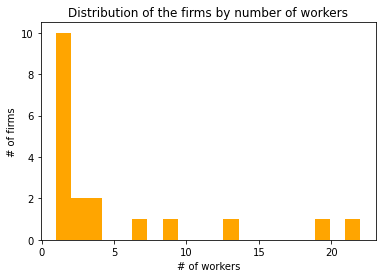

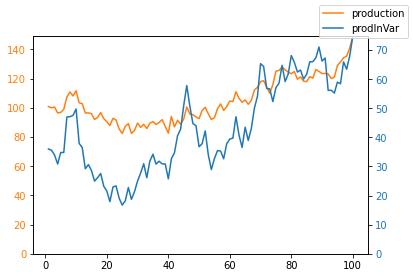

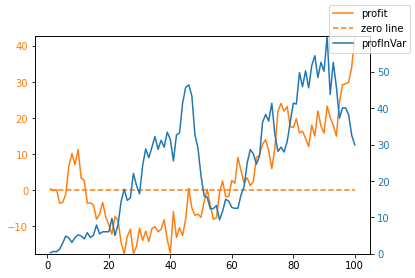

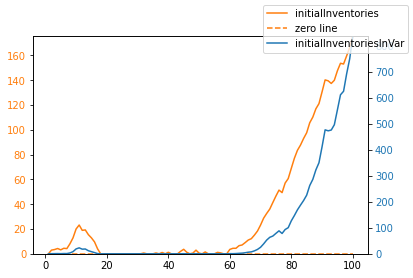

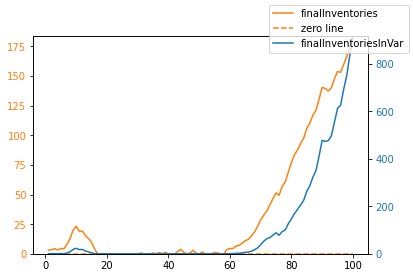

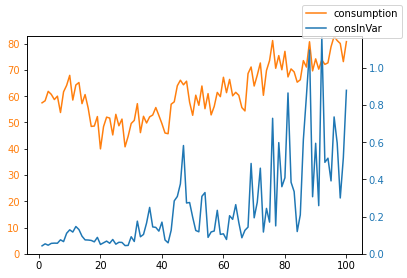

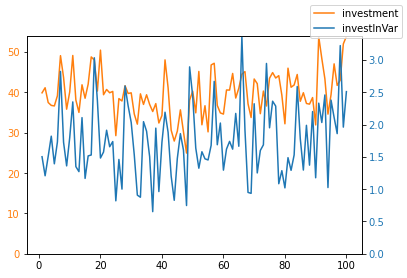

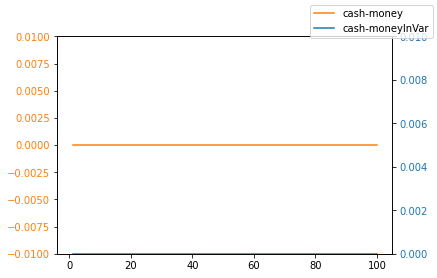

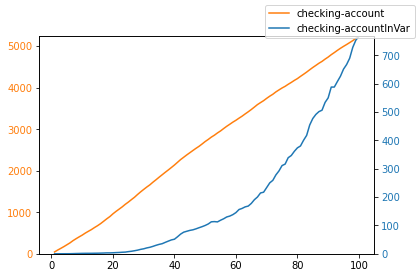

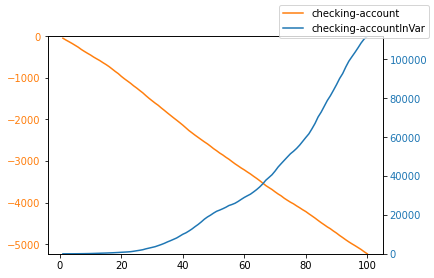

In [17]:
r.seed(121314)

setup()

cmv.actionList=["produceAll()","payWagesAll()","buyConsumptionOrInvestmentGoodsAll()",\
                "makeBalanceSheetAll()",\
                "distributeDividendAll()","accountCashMoneyAll()",\
                "accountCheckingAccountAll()","accountBankAccountAll()",\
                ]

for cmv.cycle in range(cmv.ncycles):
    for anAction in cmv.actionList:
            exec(anAction)

makeHist()   
plot1()
plot2()
plot3()
plot4()
plot5()
plot6()
plot7()
plot8()
plot9()

nationalAccounts()

In [18]:
list(cmv.firmList[i].num for i in range(cmv.firmNum))

[34, 15, 33, 37, 16, 40, 80, 61, 24, 12, 31, 25, 84, 88, 74, 95, 62, 96, 60]

In [19]:
list(cmv.entrepreneurList[i].num for i in range(cmv.firmNum))

[25, 62, 61, 12, 74, 80, 60, 33, 24, 16, 88, 84, 37, 31, 34, 95, 15, 96, 40]

In [20]:
# last cycle
tCashNe=0
for anA in cmv.agentList:
    if not anA.entrepreneur: tCashNe+=anA.cashMoney

tCashE=0
for anA in cmv.agentList:
    if anA.entrepreneur: tCashE+=anA.cashMoney

In [21]:
tCashNe

0

In [22]:
tCashE

0

In [23]:
tC=0
for i in range(cmv.ncycles):
    tC+=cmv.totalConsumptionSeries[i]

In [24]:
tC

6148.227698401605

In [25]:
tCE=0
for i in range(cmv.ncycles):
    tCE+=cmv.totalEntrepreneurConsumptionSeries[i]

In [26]:
tCE

1762.098828953021

In [27]:
tCNe=0
for i in range(cmv.ncycles):
    tCNe+=cmv.totalNonEntrepreneurConsumptionSeries[i]

In [28]:
tCNe

4386.128869448584

In [29]:
tI=0
for i in range(cmv.ncycles):
    tI+=cmv.totalInvestmentSeries[i]

In [30]:
tI

3970.8626121362613

In [31]:
cmv.totalCheckingAccountSeries

[44.59311081906003,
 89.0728587422172,
 129.58677236083184,
 171.38182020278603,
 216.45362661123468,
 261.8462121865677,
 315.98523650201355,
 362.82421279049777,
 407.3044587550366,
 449.5893068111665,
 498.5486654843346,
 541.3654507007029,
 583.0394705941923,
 631.8763937991048,
 676.9750979892636,
 727.2427822387723,
 784.5157735333776,
 842.7662643828598,
 896.2127276684123,
 962.4661358318367,
 1020.7104688603048,
 1074.4972725796222,
 1128.7429641182705,
 1190.135792754238,
 1244.0352271029653,
 1303.1828547247092,
 1360.0842539187252,
 1427.29676459414,
 1490.2359555578357,
 1548.9093799856128,
 1606.5643772669273,
 1659.2406564711239,
 1722.8103124858674,
 1781.3550300584134,
 1842.5960857908647,
 1901.4646008123086,
 1960.7180632994723,
 2017.5400992278846,
 2076.194256945687,
 2136.527440316625,
 2201.622686603094,
 2266.9743324261744,
 2322.774046946432,
 2379.1570925096353,
 2432.1090863916706,
 2485.359821341105,
 2537.8756701160073,
 2586.599229911044,
 2642.85647567572

In [32]:
cmv.totalBankAccountSeries

[-44.59311081906004,
 -89.07285874221724,
 -129.58677236083182,
 -171.38182020278612,
 -216.45362661123468,
 -261.84621218656775,
 -315.98523650201366,
 -362.8242127904976,
 -407.30445875503676,
 -449.5893068111667,
 -498.54866548433455,
 -541.3654507007031,
 -583.0394705941924,
 -631.8763937991048,
 -676.9750979892639,
 -727.2427822387723,
 -784.5157735333777,
 -842.7662643828602,
 -896.2127276684121,
 -962.4661358318368,
 -1020.7104688603048,
 -1074.4972725796224,
 -1128.74296411827,
 -1190.1357927542383,
 -1244.0352271029658,
 -1303.1828547247096,
 -1360.0842539187247,
 -1427.2967645941396,
 -1490.2359555578357,
 -1548.9093799856114,
 -1606.5643772669273,
 -1659.240656471123,
 -1722.810312485866,
 -1781.3550300584127,
 -1842.5960857908638,
 -1901.464600812309,
 -1960.7180632994712,
 -2017.5400992278837,
 -2076.194256945687,
 -2136.5274403166245,
 -2201.6226866030925,
 -2266.9743324261717,
 -2322.7740469464325,
 -2379.1570925096344,
 -2432.109086391671,
 -2485.3598213411033,
 -2537.8

In [33]:
for anA in cmv.agentList:
    if anA.entrepreneur: print(anA.perceivedDividend,anA.checkingAccount)

0 50.06242598790595
0.7631717274191876 79.63240541167202
0 47.850815570998876
1.112884904686755 50.56536510629965
0.07702576709271158 48.26425832874164
2.8606509967447256 90.94801068240697
0 49.54282900378071
4.387095780158401 111.64030531406094
9.659436781378508 296.02700705916334
2.1144239246860517 58.02265467667988
0 53.3532293866837
2.0468767481007726 90.1970276265152
3.654035196466311 123.49745287998066
1.0214455158866658 59.30710790989364
0.4057621597253416 79.05797652587025
0 47.658735942012434
0.822209668896108 70.58730514512256
0 56.931840125629
0.5720616792216373 55.47842383611865
